# HW 5-1. Neural Network

#### Execute the following statement in terminal.

sudo pip3 install tensorflow

After you installed tensorflow successfully,

sudo pip3 install keras

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.datasets import mnist
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Before we work with real datasets, here's a simple tutorial of Keras.

This would help you grasp a concept of training neural network using Keras 

You can find more info:

https://keras.io/getting-started/sequential-model-guide/

In [2]:
# Generate a random number dataset

n_dim=2
x_train, y_train = make_blobs(n_samples=1000, n_features=n_dim, centers=[[2,2],[-2,-2]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[2,2],[-2,-2]], shuffle=True)
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

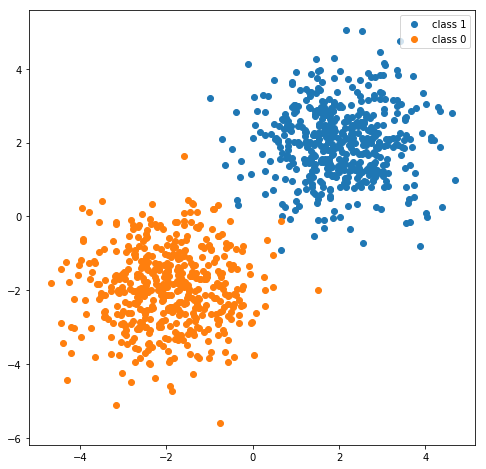

In [3]:
#plot data
index1 = (y_train==np.array([1,0]))[:,0]
index2 = (y_train!=np.array([1,0]))[:,0]
plt.figure(figsize=(8,8))
plt.scatter(x_train[index1][:,0], x_train[index1][:,1], label='class 1')
plt.scatter(x_train[index2][:,0], x_train[index2][:,1], label='class 0')
plt.legend()
plt.show()

In [4]:
# You can stack layers linearly after creating a Sequential model
model = Sequential()

# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 2-dimensional vectors.
# To add a layer, use YourModel.add() function.
# Consider proper activation functions for each layer.

model.add(Dense(64, activation='sigmoid', input_shape=(2,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [5]:
# We are optimizing 'cross entropy loss' of the model in a 'gradient descent way'.
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [6]:
# Keras provides a nice summary of your model with .summary()
# You can check the architecture and the number of parameters in the model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 4,482
Trainable params: 4,482
Non-trainable params: 0
_________________________________________________________________


In [7]:
# To train the model, simply do YourModel.fit()
# Various options/hyperparameters for the training :
# https://keras.io/models/model/#fit

hist = model.fit(x_train, y_train,
                 epochs=20,
                 batch_size=128,
                 validation_data=(x_test, y_test))

Train on 1000 samples, validate on 100 samples
Epoch 1/20
1000/1000 [==============================] - 0s 180us/step - loss: 0.7306 - acc: 0.5000 - val_loss: 0.6972 - val_acc: 0.5000
Epoch 2/20
1000/1000 [==============================] - 0s 8us/step - loss: 0.6826 - acc: 0.5000 - val_loss: 0.6743 - val_acc: 0.5000
Epoch 3/20
1000/1000 [==============================] - 0s 8us/step - loss: 0.6669 - acc: 0.5190 - val_loss: 0.6635 - val_acc: 0.6400
Epoch 4/20
1000/1000 [==============================] - 0s 9us/step - loss: 0.6584 - acc: 0.8610 - val_loss: 0.6556 - val_acc: 0.8800
Epoch 5/20
1000/1000 [==============================] - 0s 10us/step - loss: 0.6508 - acc: 0.9650 - val_loss: 0.6483 - val_acc: 0.9500
Epoch 6/20
1000/1000 [==============================] - 0s 8us/step - loss: 0.6438 - acc: 0.9830 - val_loss: 0.6413 - val_acc: 0.9500
Epoch 7/20
1000/1000 [==============================] - 0s 9us/step - loss: 0.6366 - acc: 0.9830 - val_loss: 0.6341 - val_acc: 0.9700
Epoch 8/20
1

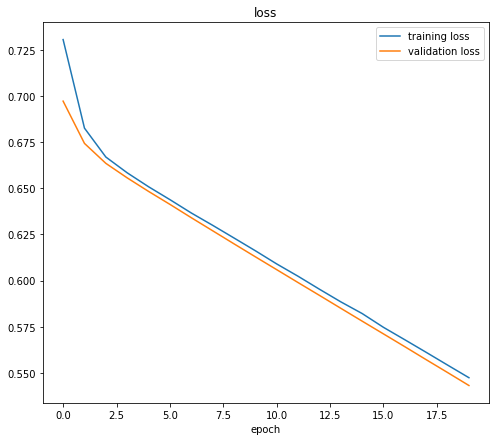

In [8]:
plt.figure(figsize=(8,7))
plt.title('loss')
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

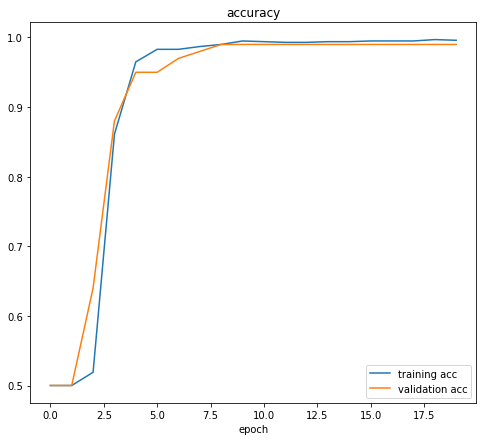

In [9]:
plt.figure(figsize=(8,7))
plt.title('accuracy')
plt.plot(hist.history['acc'], label='training acc')
plt.plot(hist.history['val_acc'], label='validation acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [10]:
# Result on the test data
score = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss : {:.3f}'.format(score[0]))
print('Test accuracy : {:.3f}'.format(score[1]))

100/100 [==============================] - 0s 20us/step
Test loss : 0.543
Test accuracy : 0.990


Now, let's try using a practical dataset.

## Preparing the datasets
The MNIST is a database of handwritten digits. 

It consists of 28x28 grayscale images of the 10 digits,
and has a training set of 60,000 examples, along with a test set of 10,000 examples.

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

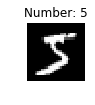

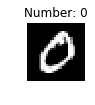

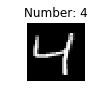

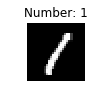

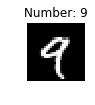

In [12]:
images_and_labels = list(zip(x_train, y_train))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title('Number: %i' % label)
    plt.show()

### Preprocessing
Before training on a neural network, we should flatten the images, and normalize them to have values between 0 and 1.

In [13]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [14]:
batch_size = 128
num_classes = 10
epochs = 20

For the labels, we use 1-of-K coding scheme, which is also known as one hot encoding.

i.e. class: 3 -> [0 0 1 0 0 0 0 0 0 0] (for the classes between 1 and 10)

In [15]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

It is your turn to construct a model.

Make a fully-connected neural network of **two hidden layers with 256 nodes** using **'sigmoid'** for activation.

Do not forget you should consider **'softmax'** for the output layer 

In [16]:
def Net(input_shape, num_classes):
    model = None
    
    ############################ Write your code #################################
    # Instructions: Make a fully-connected neural network of 
    #               two hidden layers with 256 nodes using 'sigmoid' for activation.
    #               For the output layer, you should use 'softmax' for activtaion.
    # Hint: Refer to what we did for the tutorial
    model = Sequential()
    model.add(Dense(256, activation='sigmoid', input_shape=input_shape))
    model.add(Dense(10, activation='softmax'))

    ##############################################################################
    return model

In [17]:
input_shape = x_train[0].shape
model = Net(input_shape, num_classes)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Train the model using the MNIST Dataset.

In [19]:
def train_model(model, x_train, y_train, x_test, y_test, batch_size, epochs):
    
    score = None
    
    ############################ Write your code #################################
    # Instructions: Opimize your model by SGD with learning rate '0.01'
    #               Configure the model for training(compile) 
    #                    - loss : cross entropy
    #                    - optimizer : sgd
    #                    - metrics : accuracy
    #               Using the test dataset(x_test, y_test) for the validation data,
    #               fit the model
    #               Return the model evaluation to 'score'
    sgd = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    print('test1')
    model.fit(x_train, y_train, batch_size, epochs)
    print('test2')
    score = model.evaluate(x_test, y_test, batch_size)

    
    
    ##############################################################################
    return model, score

In [20]:
model, score = train_model(model, x_train, y_train, x_test, y_test, batch_size, epochs)

test1
Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 1.9813 - acc: 0.5367
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.4589 - acc: 0.7522
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.1048 - acc: 0.8023
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.8910 - acc: 0.8256
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.7599 - acc: 0.8405
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.6738 - acc: 0.8503
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.6133 - acc: 0.8584
Epoch 8/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5685 - acc: 0.8646
Epoch 9/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5340 - acc: 0.8695
Epoch 10/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5066 - acc: 

In [21]:
print('Test loss : {:.3f}'.format(score[0]))
print('Test accuracy : {:.3f}'.format(score[1]))

Test loss : 0.366
Test accuracy : 0.899


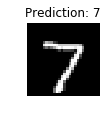

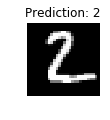

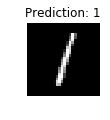

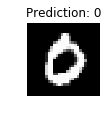

In [22]:
predict_labels = np.argmax(model.predict(x_test[:4]),axis=1)
test_image = x_test.reshape(-1, 28, 28)

images_and_labels = list(zip(test_image, predict_labels))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title('Prediction: %i' % label)
    plt.show()